### В этом проекте я проанализирую данные о работе предсказательной модели по населению городов
###### Цель: провести социально-экономические выводы и построить гипотезы по дальнейшей работе с этими данными
###### Выводы оформлю в виде дашборда

In [3]:
import pandas as pd
import numpy as np
from dash import Dash, html, dcc
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/home/konstantin/Jupyter_Notebook/Тестовое задание Allspice/forFBpost.csv')

In [5]:
df.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400,15100,15700
1,Белокуриха,2001,NaN,15400,15100,15700
2,Белокуриха,2002,NaN,15400,15000,15700
3,Белокуриха,2003,NaN,15300,15000,15700
4,Белокуриха,2004,NaN,15300,14900,15600


В датасете приводится модель прогноза по населению в городах по годам.
Верхняя и нижняя граница — это доверительные интервалы предсказательной модели.
fact — фактическое население.


Пояснение к параметрам df:

1. Город
2. year - год, в который происходит оценка населения
3. fact - фактическое население в городе
4. Модель - Население, предсказанное моделью
5. Нижняя граница - доверительный интервал в нижнюю сторону
6. Верхняя граница - доверительный интервал в вверхнюю сторону

Проверка типа данных, пропущенных значений и повторов

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            30250 non-null  object 
 1   year             30250 non-null  int64  
 2   fact             3250 non-null   float64
 3   Модель           30250 non-null  int64  
 4   Нижняя граница   30250 non-null  int64  
 5   Верхняя граница  30250 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

Город                  0
year                   0
fact               27000
Модель                 0
Нижняя граница         0
Верхняя граница        0
dtype: int64

In [8]:
len(df['Город'].unique()) #уникальные значения городов

248

###### Можно заметить, что фактические наблюдения не сходятся с данными предсказательной модели.
###### Это связано с неполной информацией наблюдений и тем, что срок предсказания по некоторым периодам не наступил.

###### Проверим для каких городов у нас больше наблюдений, для каких - меньше.

In [9]:
agg_func = {'fact': ['count'], 'Модель':['count']}
df_group = df.groupby(['Город']).agg(agg_func).round(2)
df_group.drop_duplicates()

,fact,Модель
,count,count
Город,,
Буй,13,121
Кировск,26,242


###### Можем заметить, что города разделены на несколько групп по кол-ву наблюдений и предсказаний

In [10]:
df_group[df_group.isin([13]).any(axis= 1 )]

,fact,Модель
,count,count
Город,,
Буй,13,121
Оха,13,121
Реж,13,121
Уфа,13,121
Шуя,13,121
...,...,...
Якутск,13,121
Ялта,13,121


In [11]:
df_group[df_group.isin([26]).any(axis= 1 )]

,fact,Модель
,count,count
Город,,
Кировск,26,242
Краснослободск,26,242


###### Почистим данные от неизвестных параметров и оценим предсказательную модель

In [12]:
df_clean = df.dropna()

In [13]:
df_clean.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
8,Белокуриха,2008,14781.0,14900,14600,15200
9,Белокуриха,2009,14781.0,14800,14500,15100
10,Белокуриха,2010,14701.0,14700,14400,15100
11,Белокуриха,2011,14516.0,14700,14400,15000
12,Белокуриха,2012,14375.0,14700,14400,15000


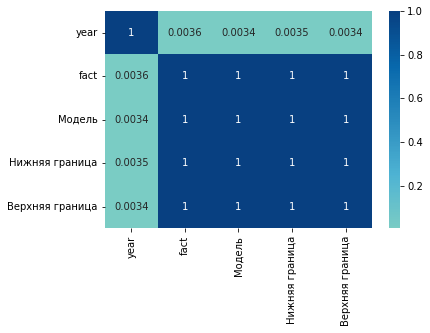

In [14]:
sns.heatmap(df_clean.corr(), cmap = 'GnBu', center =0, annot=True)

###### Между данными хорошая корреляция, создадим графическое представление

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72e9371c10>,
      dtype=object)

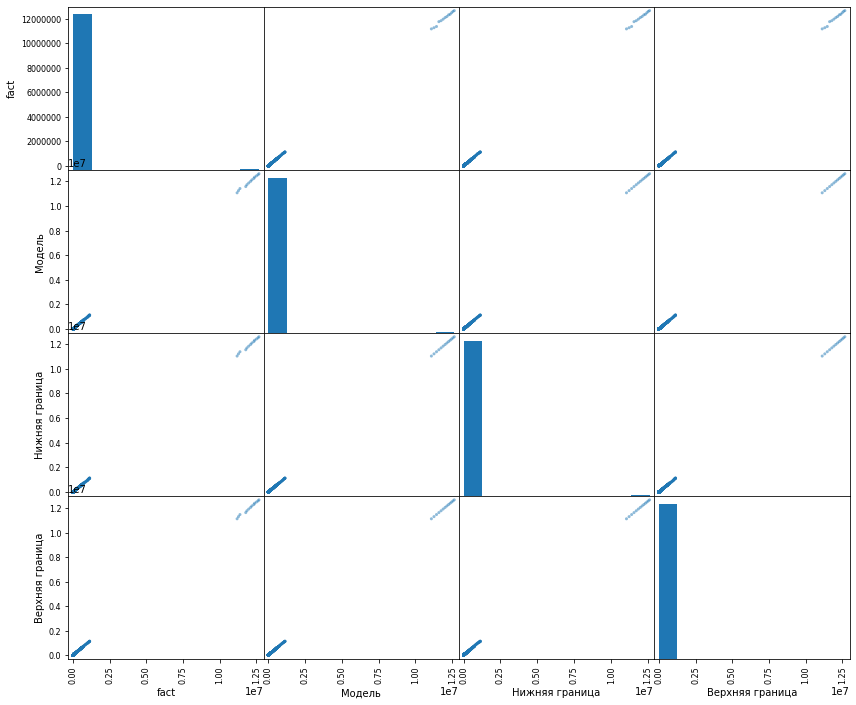

In [15]:
pd.plotting.scatter_matrix(df_clean.drop(['year'], axis=1), figsize=(14,12))

In [16]:
r = df_clean['fact'].corr(df_clean['Модель'])
r1 = df_clean['fact'].corr(df_clean['Нижняя граница'])
r2 = df_clean['fact'].corr(df_clean['Верхняя граница'])
print(f'Расчет коэффициента корреляции :{r}, {r1} и {r2}')

Расчет коэффициента корреляции :0.9999866609825327, 0.9999831653533293 и 0.9999784290469933


###### Между фактическими наблюдениями и Моделью сильная корреляция

###### Отмасштабируем модель к изначальной. Сильная положительная линейная корреляция сохраняется.

In [17]:
r = df['fact'].corr(df['Модель'])
r1 = df['fact'].corr(df['Нижняя граница'])
r2 = df['fact'].corr(df['Верхняя граница'])
print(f'Расчет коэффициента корреляции :{r}, {r1} и {r2}')

Расчет коэффициента корреляции :0.9999866609825327, 0.9999831653533293 и 0.9999784290469933


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72e7b2b710>,
      dtype=object)

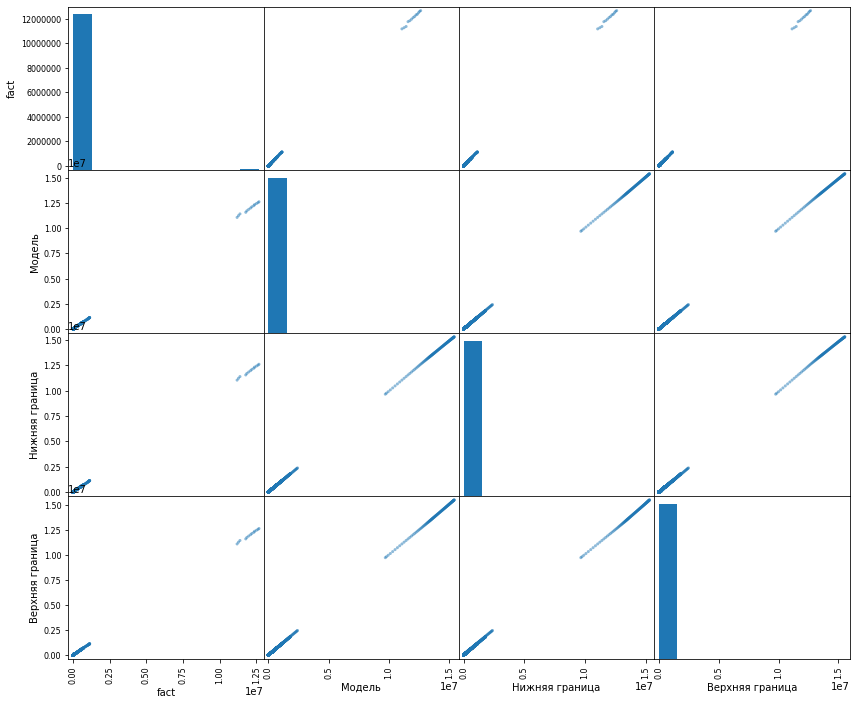

In [18]:
pd.plotting.scatter_matrix(df.drop(['year'], axis = 1), figsize=(14,12))

###### Выбор метрики отклонения модели

###### Модель оценивает динамику изменение населения от года к году, предположу, что это линейная регрессия или time series.
Значит имеет смысл оценить среднеквадратичное отклонение как промежутучную оценку,
и абсолютную ошибку, чтобы понять по каким городам данные точнее.

In [19]:
df_clean['Среднеквадратичное отклонение'] = ((df_clean.fact.astype(int) - df_clean['Модель'])**2)**(0.5)
df_clean

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Среднеквадратичное отклонение
8,Белокуриха,2008,14781.0,14900,14600,15200,119.0
9,Белокуриха,2009,14781.0,14800,14500,15100,19.0
10,Белокуриха,2010,14701.0,14700,14400,15100,1.0
11,Белокуриха,2011,14516.0,14700,14400,15000,184.0
12,Белокуриха,2012,14375.0,14700,14400,15000,325.0
...,...,...,...,...,...,...,...
30145,Облучье,2016,9960.0,9800,9500,10200,160.0
30146,Облучье,2017,9875.0,9800,9500,10200,75.0
30147,Облучье,2018,9681.0,9800,9400,10100,119.0
30148,Облучье,2019,9582.0,9700,9400,10000,118.0


In [27]:
agg_func2 = {'fact': ['count'], 'Модель':['count'], 'Среднеквадратичное отклонение':['mean']}
df_clean.groupby(['Город']).agg(agg_func2).round(2)

,fact,Модель,Среднеквадратичное отклонение
,count,count,mean
Город,,,
Буй,13,13,199.54
Оха,13,13,625.23
Реж,13,13,131.92
Уфа,13,13,5150.92
Шуя,13,13,216.85
...,...,...,...
Якутск,13,13,4728.54
Ялта,13,13,658.31


###### Советую поработать над источниками сбора данных для городов с высоким Среней абсолютной ошибкой, это улучшит модель.
###### В данном случае rmse.mean() = mape

###### Прежде чем перейти к дашборду, нужно понять: положительная или отрицательная динамика прироста населения в исследуемых городах.

In [33]:
df_clean['Прирост населения'] = df_clean.fact.astype(int) - df_clean['Модель']
df_clean.head(15)

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Среднеквадратичное отклонение,Динамика,Прирост населения
8,Белокуриха,2008,14781.0,14900,14600,15200,119.0,-119,-119
9,Белокуриха,2009,14781.0,14800,14500,15100,19.0,-19,-19
10,Белокуриха,2010,14701.0,14700,14400,15100,1.0,1,1
11,Белокуриха,2011,14516.0,14700,14400,15000,184.0,-184,-184
12,Белокуриха,2012,14375.0,14700,14400,15000,325.0,-325,-325
13,Белокуриха,2013,14435.0,14700,14400,15000,265.0,-265,-265
14,Белокуриха,2014,14701.0,14700,14400,15000,1.0,1,1
15,Белокуриха,2015,14974.0,14700,14400,15100,274.0,274,274
16,Белокуриха,2016,15168.0,14800,14500,15100,368.0,368,368
17,Белокуриха,2017,15221.0,14900,14500,15200,321.0,321,321


In [37]:
agg_func3 = {'fact': ['count'], 'Модель':['count'], 'Среднеквадратичное отклонение':['mean'], 'Прирост населения':['sum']}
df_1=df_clean.groupby(['Город']).agg(agg_func3).round(2)
df_1

,fact,Модель,Среднеквадратичное отклонение,Прирост населения
,count,count,mean,sum
Город,,,,
Буй,13,13,199.54,-1512
Оха,13,13,625.23,-5566
Реж,13,13,131.92,-1367
Уфа,13,13,5150.92,60876
Шуя,13,13,216.85,-1029
...,...,...,...,...
Якутск,13,13,4728.54,47947
Ялта,13,13,658.31,3446


In [40]:
df_clean.to_csv('file_1.csv', header=True, sep=';')
df_1.to_csv('file_2.csv', header=True, sep=';')